In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.linear_model import LogisticRegression
import scipy
from scipy.spatial.distance import pdist,cdist
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report,f1_score,confusion_matrix)

from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [10]:
col_names=["EAR","YAWN","PULSE","OUTPUT"]
df= pd.read_csv("Accident_prone_dataset.csv")
df.head()

,EAR,YAWN,PULSE,OUTPUT
0,0.327041,11.833333,90.6,1
1,0.377836,11.833333,50.4,0
2,0.371883,11.833333,50.4,0
3,0.323330,11.833333,50.6,0
4,0.290491,11.166667,80.6,1


In [11]:
new_df = df.dropna()
new_df

,EAR,YAWN,PULSE,OUTPUT
0,0.327041,11.833333,90.6,1
1,0.377836,11.833333,50.4,0
2,0.371883,11.833333,50.4,0
3,0.323330,11.833333,50.6,0
4,0.290491,11.166667,80.6,1
...,...,...,...,...
2035,0.330147,21.666667,181.0,1
2036,0.268312,21.666667,55.0,1
2037,0.324901,21.666667,183.0,1
2038,0.300626,20.500000,183.0,1


In [12]:
ne_df = new_df.fillna(method="ffill") #fill the value same as previous value
ne_df

,EAR,YAWN,PULSE,OUTPUT
0,0.327041,11.833333,90.6,1
1,0.377836,11.833333,50.4,0
2,0.371883,11.833333,50.4,0
3,0.323330,11.833333,50.6,0
4,0.290491,11.166667,80.6,1
...,...,...,...,...
2035,0.330147,21.666667,181.0,1
2036,0.268312,21.666667,55.0,1
2037,0.324901,21.666667,183.0,1
2038,0.300626,20.500000,183.0,1


In [13]:
ne_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 2039
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EAR     2039 non-null   float64
 1   YAWN    2039 non-null   float64
 2   PULSE   2039 non-null   float64
 3   OUTPUT  2039 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 79.6 KB


In [15]:
ne_df['EAR'] = ne_df['EAR'].astype(float)
ne_df['YAWN'] = ne_df['YAWN'].astype(float)
ne_df['PULSE'] = ne_df['PULSE'].astype(float)
ne_df['OUTPUT'] = ne_df['OUTPUT'].astype(float)
ne_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 2039
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EAR     2039 non-null   float64
 1   YAWN    2039 non-null   float64
 2   PULSE   2039 non-null   float64
 3   OUTPUT  2039 non-null   float64
dtypes: float64(4)
memory usage: 79.6 KB


In [17]:
col_names=["EAR","YAWN","PULSE","OUTPUT"]
ne_df.head()

,EAR,YAWN,PULSE,OUTPUT
0,0.327041,11.833333,90.6,1.0
1,0.377836,11.833333,50.4,0.0
2,0.371883,11.833333,50.4,0.0
3,0.323330,11.833333,50.6,0.0
4,0.290491,11.166667,80.6,1.0


In [46]:
feature_cols=["EAR","YAWN","PULSE","OUTPUT"]
X=ne_df[feature_cols]
y=ne_df.OUTPUT

In [47]:
def calculateScore(confMat):
    TP = confMat[0][0]
    TN = confMat[1][1]
    FP = confMat[0][1]
    FN = confMat[1][0]
    SEN=[]
    SPE=[]
    
    
    SEN.append(TP / (TP + FN))
    SPE.append(TN / (FP + TN))
    FPR.append(FP / (FP + TN))
    FNR.append(FN / (FN + TP))

In [48]:
from sklearn.model_selection import train_test_split
train, test, target_train, target_val=train_test_split(X,y,test_size=0.25,random_state=0)

In [49]:
Model = []
Accuracy= []
F1Score = []
Precision=[]
Recall=[]

In [50]:
LR = LogisticRegression(multi_class='auto')
LR.fit(train,target_train)
lr_pred = LR.predict(test)
Model.append('Logistic Regression')
Accuracy.append(accuracy_score(target_val,lr_pred))
Precision.append(precision_score(target_val,lr_pred))
Recall.append(recall_score(target_val,lr_pred))
F1Score.append(f1_score(target_val,lr_pred,average=None))
print(classification_report(target_val,lr_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        97
         1.0       1.00      1.00      1.00       413

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



In [51]:
data = confusion_matrix(target_val,lr_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

NameError: name 'SEN' is not defined

In [25]:
#NAIVEBAYES
naiveClassifier=GaussianNB()
naiveClassifier.fit(train, target_train)
naiveClassifier_pred = naiveClassifier.predict(test)
print(classification_report(target_val,naiveClassifier_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        97
         1.0       1.00      1.00      1.00       413

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



In [26]:
Model.append('Naive')
Accuracy.append(accuracy_score(target_val,naiveClassifier_pred))
Precision.append(precision_score(target_val,naiveClassifier_pred))
Recall.append(recall_score(target_val,naiveClassifier_pred))
F1Score.append(f1_score(target_val,naiveClassifier_pred,average=None))

In [27]:
data = confusion_matrix(target_val,naiveClassifier_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

NameError: name 'Sen' is not defined

In [28]:
result = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'F1Score':F1Score, 'Precision':Precision, 'Recall': Recall})


In [32]:
feature_cols=["EAR","YAWN","PULSE","OUTPUT"]
X=ne_df[feature_cols]
y=ne_df.OUTPUT

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Accuracy : 1.0
Accuracy : 1.0


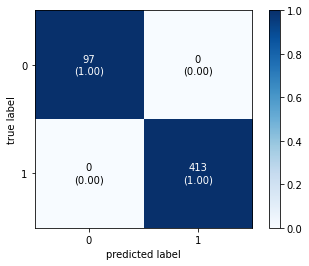

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        97
         1.0       1.00      1.00      1.00       413

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



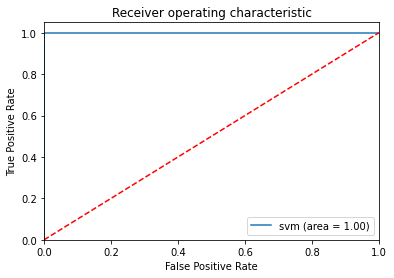

In [41]:
#SVM
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf', gamma=0.0001, C=100,probability=True)
svm_clf.fit(X_train,y_train)
y_pred_svm =svm_clf.predict(X_train)
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_train,y_pred_svm)
print("Accuracy :",svm_result)
y_pred_svm =svm_clf.predict(X_test)
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
binary = np.array(cm_svm)

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()
recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
recall_svm,precision_svm
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svm_roc_auc = roc_auc_score(y_test, svm_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='svm (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('svm_ROC')
plt.show()
Model.append('SVM')
Accuracy.append(svm_result )
Precision.append(precision_svm)
Recall.append(recall_svm)
F1Score.append([0.98936,0.97452])

In [40]:
pip install mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [42]:
#KNN
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(train, target_train)
knn_pred = knn.predict(test)
print(classification_report(target_val,knn_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87        97
         1.0       0.99      0.94      0.97       413

    accuracy                           0.95       510
   macro avg       0.90      0.95      0.92       510
weighted avg       0.95      0.95      0.95       510



In [43]:
Model.append('KNN')
Accuracy.append(accuracy_score(target_val,knn_pred))
Precision.append(precision_score(target_val,knn_pred))
Recall.append(recall_score(target_val,knn_pred))
F1Score.append(f1_score(target_val,knn_pred,average=None))

In [44]:
data = confusion_matrix(target_val,knn_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(target_val), index = np.unique(target_val))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.8)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

NameError: name 'Sen' is not defined

In [38]:
print(len(Model), len(Accuracy), len(F1Score), len(Precision), len(Recall))

3 3 3 3 3


In [45]:
result = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'F1Score':F1Score, 'Precision':Precision, 'Recall': Recall})
print(result)

                 Model  Accuracy                                  F1Score  \
0  Logistic Regression  1.000000                               [1.0, 1.0]   
1                Naive  1.000000                               [1.0, 1.0]   
2                  KNN  0.947059  [0.8732394366197184, 0.966542750929368]   
3                  SVM  1.000000                       [0.98936, 0.97452]   
4                  KNN  0.947059  [0.8732394366197184, 0.966542750929368]   

   Precision   Recall  
0   1.000000  1.00000  
1   1.000000  1.00000  
2   0.989848  0.94431  
3   0.190196  1.00000  
4   0.989848  0.94431  
